## Final Project Submission

Please fill out:

- Student name: Kibandi Christine Wambui
- Student pace: full time
- Scheduled project review date/time:
- Instructor name: Mark Tiba
- Blog post URL:


Business Understanding:

The real estate agency aims to provide advice to homeowners on how home renovations can increase the estimated value of their homes and by what amount. The agency wants to identify the factors that contribute most significantly to the increase in house prices after renovations. By understanding these factors, they can guide homeowners in making informed decisions about renovations that will yield a higher return on investment.


Data Understanding:

The dataset used for this analysis is the King County House Sales dataset. It contains information about various features of houses.

The available columns in the dataset are as follows:

• id: A property identification number

• date: Date of transaction

• price: Price of the house

• bedrooms: Number of bedrooms

• bathrooms: Number of bathrooms

• sqft_living: Square footage of the living space

• sqft_lot: Square footage of the lot

• floors: Total floors in the house

• waterfront: Whether the house is on a waterfront (1: yes, 0: no)

• view: Special view

• condition: Condition of the house

• grade: Grading level around the house

• sqft_above: Square footage of the house apart from the basement

• sqft_basement: Square footage of the basement area

• yr_built: Year when the house was built

• yr_renovated: Year when the house was renovated

• zipcode: Zip code of the house

• lat: Latitude coordinate of the house

• long: Longitude coordinate of the house

The goal of the analysis is to build a multiple linear regression model that can predict the impact of home renovations on the estimated value of houses. By identifying the significant predictors, the real estate agency can provide homeowners with actionable recommendations on which renovations are most likely to yield a higher return on investment.


In [1]:
import pandas as pd
import numpy as np
from numbers import Number
import warnings
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

warnings.filterwarnings('ignore')

loading the dataset , data showing and understanding


In [2]:
df = pd.read_csv('kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.shape


(21597, 21)

In [6]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.duplicated().sum()

0

DATA PREPARATION

viewing the columns with null data, cleaning and handling outliers,droping columns changing column,etc


DATA CLEANING


Waterfront


In [9]:
# viewing the waterfront column to see if it has any null values

df['waterfront']

0        NaN
1         NO
2         NO
3         NO
4         NO
        ... 
21592     NO
21593     NO
21594     NO
21595    NaN
21596     NO
Name: waterfront, Length: 21597, dtype: object

In [10]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
df['waterfront'].isnull().sum()

2376

In [12]:
df['waterfront'].fillna('No', inplace=True)

In [13]:
df['waterfront'].isnull().sum()

0

In [14]:
change = {'No':0, 'Yes':1}
df['waterfront'] = df['waterfront'].map(change)


In [15]:
df['waterfront']

0        0.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21592    NaN
21593    NaN
21594    NaN
21595    0.0
21596    NaN
Name: waterfront, Length: 21597, dtype: float64

View:Replace the null values with None


In [16]:
df['view'].head()

0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
Name: view, dtype: object

In [17]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [18]:

df['view'].isnull().sum()

63

In [19]:

df['view'].fillna('None', inplace=True)

In [20]:
df['view'].isnull().sum()

0

Viewing the grade column


In [21]:
df['grade']

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

Converting the grade column to a categorical column

In [22]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [23]:
new_grades = {'7 Average':7, '8 Good': 8, '9 Better': 9, '6 Low Average':6, '10 Very Good': 10, '11 Excellent' :11, '5 Fair':5, '12 Luxury' : 12, '4 Low':4, '13 Mansion':13, '3 Poor':3 }
df['grade'] = df['grade'].map(new_grades)


In [24]:
df['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

In [25]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Conditional column:

converting the data into a scale ranging from poor to very good

In [26]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [27]:
#label_encoder = LabelEncoder()
#df['condition'] = label_encoder.fit_transform(df['condition']) 
#df['condition'].value_counts()

In [28]:
conditions_range = {1 :'Poor', 2:'Fair', 3:'Average', 4:'Good', 5:'Very Good'}
df['condition'] = df['condition'].map(conditions_range)

In [29]:
df['condition']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21592    NaN
21593    NaN
21594    NaN
21595    NaN
21596    NaN
Name: condition, Length: 21597, dtype: object

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NaN,NONE,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NaN,NONE,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NaN,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NaN,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Drop columns:

Some columns wont contribute much to our models.


In [31]:
dropping_columns = ["id","date",'yr_renovated','sqft_basement','lat','long','zipcode','sqft_living15','sqft_lot15','sqft_above']
df.drop(dropping_columns, inplace=True, axis = 1)


In [43]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built'],
      dtype='object')

Checking for duplicates


In [32]:
duplicates = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4348   259950.0         2       2.00         1070       649     2.0   
14969  585000.0         3       2.50         2290      5089     2.0   
17228  629950.0         3       2.50         1680      1683     2.0   
20038  555000.0         3       2.50         1940      3211     2.0   
20508  529500.0         3       2.25         1410       905     3.0   
21458  359800.0         5       2.50         2170      2752     2.0   
21518  599000.0         3       1.75         1650      1180     3.0   

       waterfront  view condition  grade  yr_built  
4348          NaN  NONE       NaN      9      2008  
14969         NaN  NONE       NaN      9      2001  
17228         NaN  NONE       NaN      9      2014  
20038         NaN  NONE       NaN      8      2009  
20508         NaN  NONE       NaN      9      2014  
21458         NaN  NONE       NaN      8      2014  
21518         NaN  NONE       NaN      8    

Retain one the duplicates : the duplicates contain valuable information that i don't want to lose entirely


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   2376 non-null   float64
 7   view         21597 non-null  object 
 8   condition    0 non-null      object 
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.8+ MB


In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,2376.0,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.0,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.0,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.0,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.0,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.0,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,13.000000,2015.000000


Data Visualization


To check missing values


<Axes: >

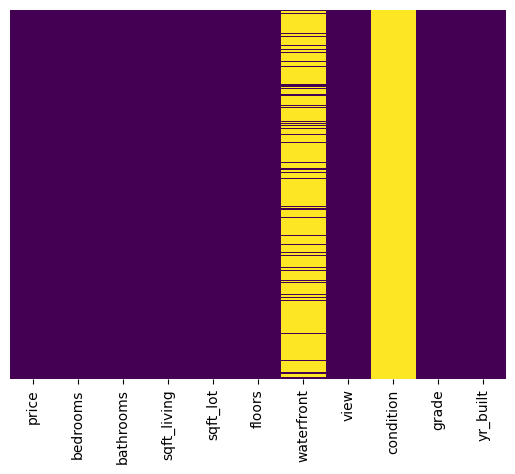

In [35]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

According to the above figure the dataset now has no missing values this is because the figure has only one shade.


To check the correlation between the variables


<Axes: >

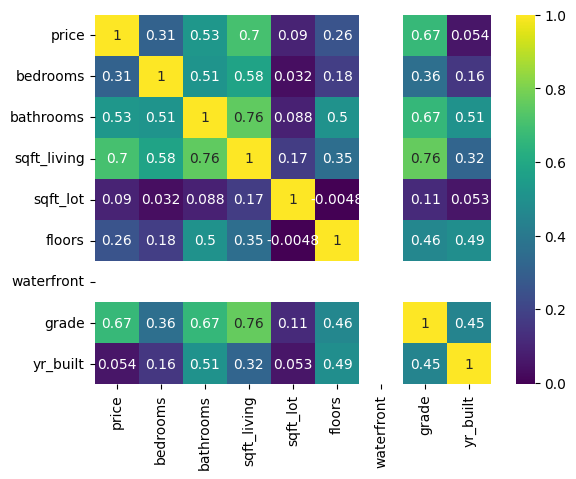

In [36]:
plt.Figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Dark shades represents positive correlation while lighter shades represents negative correlation.

Here we can infer that "floors" and has weak negative correlation with "sqft_lot"

whereas "sqft_living it has strong positive correlation with "bathrooms".


Checking for Outliers


In [37]:
# Selecting only the numerical columns
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
numerical_df = df[numerical_columns]

# Calculating z-scores for all numerical columns
z_scores = (numerical_df - numerical_df.mean()) / numerical_df.std()

# Setting a threshold for outlier detection
threshold = 3

# Checking for outliers by identifying values with z-score greater than the threshold
outliers = df[(z_scores > threshold).any(axis=1)]


print(outliers)


           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0         4       4.50         5420    101930     1.0   
21     2000000.0         3       2.75         3050     44867     1.0   
145     921500.0         4       2.50         3670    315374     2.0   
153    2250000.0         4       3.25         5180     19850     2.0   
199     385000.0         3       1.75         1350    155073     1.0   
...          ...       ...        ...          ...       ...     ...   
21532  1060000.0         2       1.50         2370    184231     2.0   
21535  1380000.0         5       4.50         4350     13405     2.0   
21552  1700000.0         4       3.50         3830      8963     2.0   
21560  3570000.0         5       4.50         4850     10584     2.0   
21574  1220000.0         4       3.50         4910      9444     1.5   

       waterfront       view condition  grade  yr_built  
5             NaN       NONE       NaN     11      2001  
21            NaN  

Visualize the outliers


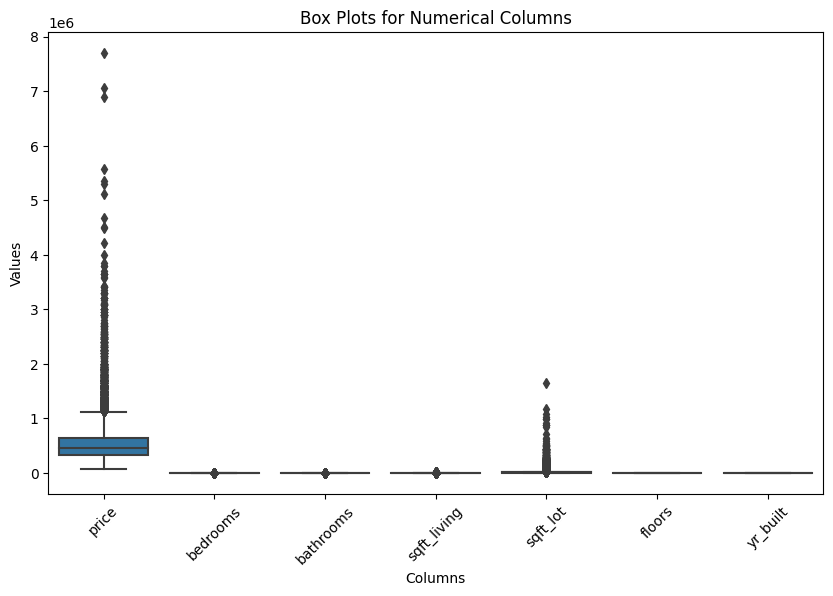

In [38]:
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
numerical_df = df[numerical_columns]

plt.figure(figsize=(10,6))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.title("Box Plots for Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()


To check for skewness :

Skewness measures the asymmetry of the distribution.

close to 0 : indicates a symmetric distribution...ie bathrooms

positively skewed frequency curve: there are more observations below the mean....ie. sqft_lot

negative skewed frequency curve: there are more observations above the mean.....ie yr_built


In [39]:
skewness = df.skew(axis=0, skipna=True, numeric_only=True,)
skewness  

price           4.023365
bedrooms        2.023641
bathrooms       0.519709
sqft_living     1.473215
sqft_lot       13.072604
floors          0.614497
waterfront      0.000000
grade           0.788237
yr_built       -0.469450
dtype: float64

Plotting the skewness of the columns in the dataset


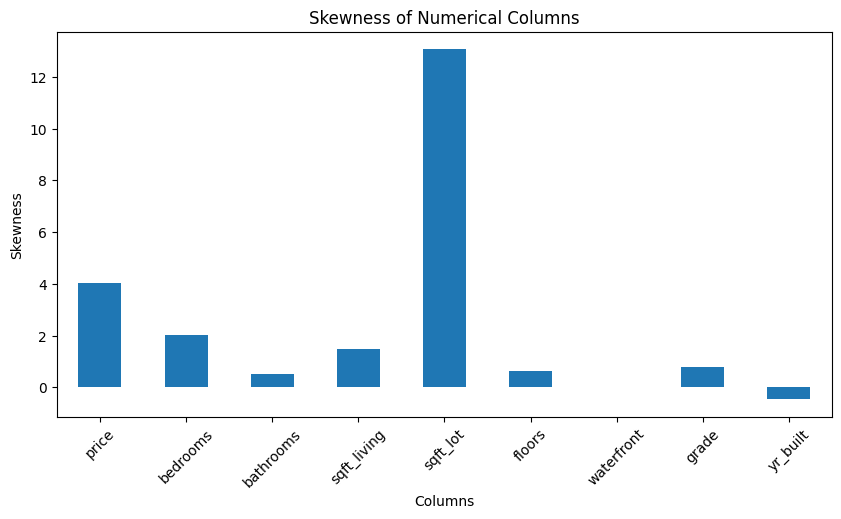

In [40]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical column
skewness = numerical_columns.skew()

# Plotting the skewness
plt.figure(figsize=(10,5))
skewness.plot(kind='bar')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


LINEAR REGRESSION


PRICE VS GRADE 

There is a close relationship between the price of a house and the grade
where the fact on whether a house is a graded as a mansion,luxury,excellent, better it will affect the price of the house.

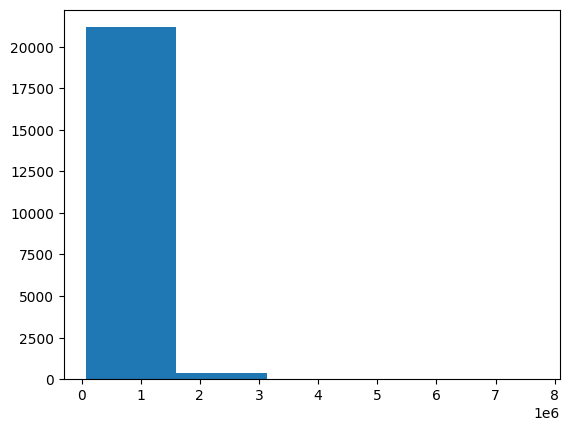

In [41]:
# visualizing of the price column
plt.hist('price',data=df,bins=5)
plt.show()

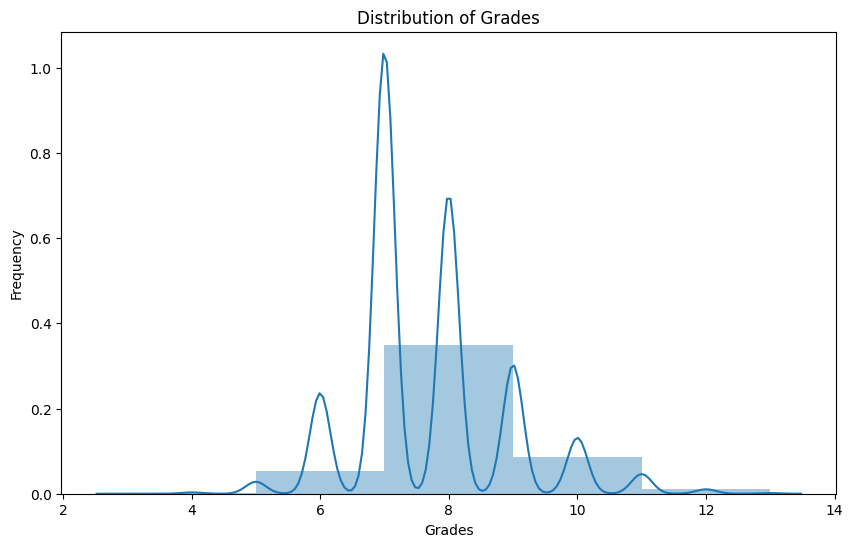

In [49]:
# visualizing the distribution of the grade column
fig = plt.figure(figsize=(10,6))
sns.distplot(df['grade'], bins=5)
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()



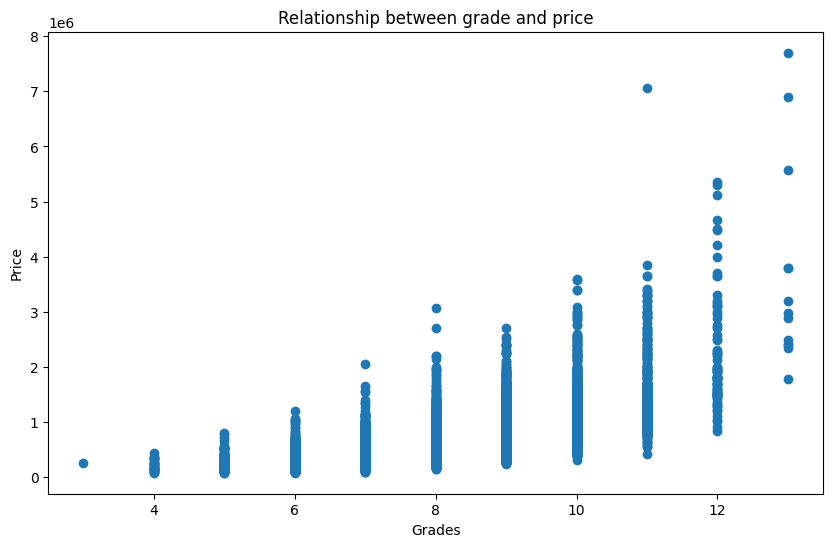

The coefficient for our model is  [211516.22123553]
The intercept for our model is  -1078219.9856528589
The model performance for training set
--------------------------------------
RMSE is 271483.82054584136
R2 score is 0.43399193438808736
Mse is 73703464818.1666


The model performance for testing set
--------------------------------------
RMSE is 271483.82054584136
R2 score is 0.43399193438808736
Mse is 73703464818.1666




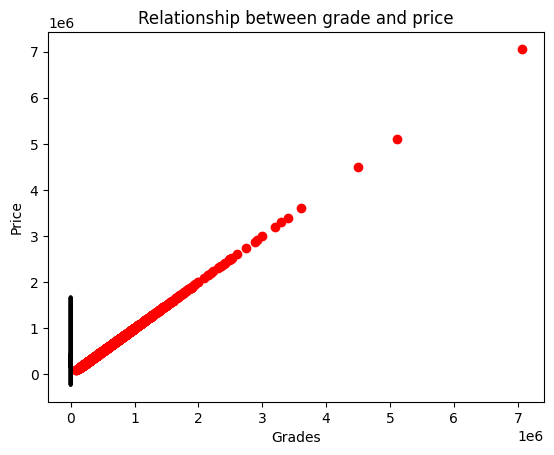

In [51]:
#visualize the relationship between the price and the grade
fig = plt.figure(figsize=(10,6))
plt.scatter(df['grade'], df['price'])
plt.xlabel('Grades')
plt.ylabel('Price')
plt.title('Relationship between grade and price')
plt.show()

# split the data into training and testing sets
X = df[['grade']]
y= df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create an fit the linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

#retrieve the intercept and the coefficient from the model
coefficients = model.coef_
intercept = model.intercept_
print("The coefficient for our model is ", coefficients)
print ("The intercept for our model is ", intercept)

#predict the prices
y_pred = model.predict(X_test)

#evaluate the model
plt.scatter(y_test, y_test, color='red')
plt.plot(X_test, y_pred, color='Black', linewidth=3)
plt.xlabel('Grades')
plt.ylabel('Price')
plt.title('Relationship between grade and price')


#Calculating the models metrics
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 score is {}'.format(metrics.r2_score(y_test, y_pred)))
print('Mse is {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 score is {}'.format(metrics.r2_score(y_test, y_pred)))
print('Mse is {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print("\n")
